In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['text.usetex'] = True

In [4]:
#df = pd.read_csv("./Dropbox/03_Yechan3/연구/서연이랑/GODE/ex2_kappa_results.csv")
df = pd.read_csv("~/Dropbox/03_Yechan3/연구/서연이랑/GODE/ex2_kappa_results.csv")
df

,Kappa,Accuracy,Precision,Recall,F1,AUC,Iteration
0,0.01,0.897,0.02,0.018182,0.019048,0.527561,0
1,0.02,0.897,0.02,0.018182,0.019048,0.527561,0
2,0.03,0.903,0.08,0.072727,0.076190,0.542184,0
3,0.04,0.907,0.12,0.109091,0.114286,0.596094,0
4,0.05,0.945,0.50,0.454545,0.476190,0.764618,0
...,...,...,...,...,...,...,...
35995,11.96,0.943,0.44,0.431373,0.435644,0.810740,29
35996,11.97,0.943,0.44,0.431373,0.435644,0.817517,29
35997,11.98,0.943,0.44,0.431373,0.435644,0.808446,29
35998,11.99,0.947,0.48,0.470588,0.475248,0.823054,29


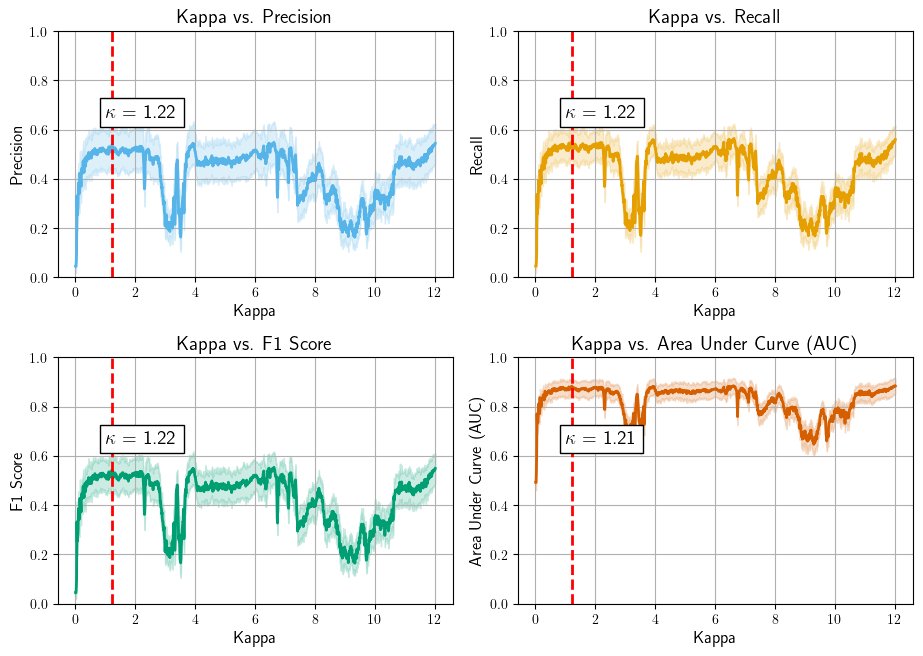

In [54]:
plt.figure(figsize=(14*2/3, 10*2/3))

# Adjusting the approach to find the optimal Kappa for each metric
optimal_kappas = {}

# Use full names for F1 Score and AUC
full_names = {
    'Precision': 'Precision',
    'Recall': 'Recall',
    'F1': 'F1 Score',
    'AUC': 'Area Under Curve (AUC)'
}

for metric in metrics:
    near_2_range = df[(df['Kappa'] >= 0) & (df['Kappa'] <= 2)]
    mean_values = near_2_range.groupby('Kappa')[metric].mean()
    optimal_kappa = mean_values.idxmax()
    optimal_kappas[metric] = optimal_kappa

optimal_kappas

for i, metric in enumerate(metrics):
    means = df.groupby('Kappa')[metric].mean().to_numpy()
    std_devs = df.groupby('Kappa')[metric].std().fillna(0).to_numpy()
    kappa_values = df.groupby('Kappa')[metric].mean().index.to_numpy()

    plt.subplot(2, 2, i + 1)
    plt.plot(kappa_values, means, label=full_names[metric], linestyle='-', linewidth=2, color=colors[metric])
    plt.fill_between(kappa_values, means - std_devs, means + std_devs, alpha=0.2, color=colors[metric])
    
    # Set y-axis limit to [0, 1]
    plt.ylim(0, 1)
    
    # Add red dotted line at the optimal Kappa
    plt.axvline(x=optimal_kappas[metric], color='red', linestyle='--', linewidth=2)
    
    # Annotate the optimal Kappa value, making the text more prominent
    plt.text(optimal_kappas[metric] - 0.2, 0.65, f'$\kappa$ = {optimal_kappas[metric]:.2f}', 
             fontsize=14, color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=1.0))

    plt.title(f'Kappa vs. {full_names[metric]}', fontsize=14)
    plt.xlabel('Kappa', fontsize=12)
    plt.ylabel(full_names[metric], fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()